In [ ]:
import pandas as pd
import re
from collections import Counter

# Загрузка данных
import file_loader as fl

file_path = 'scotch_review2020.csv'
df = fl.load_data(file_path)

print(df.info)

In [ ]:
# Поиск повторяющихся тезисов в описании для генерации новых столбцов

import word_finder as wf

finder = wf.finder(df)

In [ ]:
# Генерация новых столбцов

df = df.rename(columns={'description.1.2247.': 'description'})

# Список слов для поиска и создания столбцов
selected_words = [
    'smoke', 'peat', 'sherry', 'vanilla', 'fruit', 'sweet', 'orange', 'fruits', 'toffee',
    'spices', 'palate', 'spicy', 'pepper', 'apple', 'ginger', 'citrus', 'wood', 'caramel',
    'smoky', 'fruity', 'spice', 'oak', 'caramel', 'honey', 'chocolate']

import corrector as cor

word_changes = cor.word_changer(df, selected_words)

#Удаляем лишние столбцы
df = df.drop(['id', 'currency', 'description', 'repeated_words'], axis=1)

df['price'] = df['price'].str.replace(',', '', regex=True)

df, changed = cor.interactive_price_corrector_direct(df, 'price')

print(df.head)

In [ ]:
# Сохраняем результат
df.to_csv('scotch_review_corrected.csv', index=False)

In [1]:
import file_loader as fl

file_path = 'scotch_review_corrected.csv'
df = fl.load_data(file_path)

print(df.info)

Данные успешно загружены. Размер: (2247, 28)
<bound method DataFrame.info of                                                    name  \
0         Black Bowmore 42 year old 1964 vintage, 40.5%   
1           Bowmore 46 year old (distilled 1964), 42.9%   
2                        Johnnie Walker Blue Label, 40%   
3       Glenlivet Cellar Collection 1969 vintage, 50.8%   
4     The Macallan 29 year old 1976 Vintage (Cask #1...   
...                                                 ...   
2242    BenRiach Sauternes Wood Finish 16 year old, 46%   
2243                          The Macallan Whisky Maker   
2244  Arran St. Emilion Wine Cask Finish (Limited Ed...   
2245                                 Smoking Ember, 40%   
2246                     Teaninich, 1996 vintage, 55.3%   

                   category  review.point    price  has_smoke  has_peat  \
0        Single Malt Scotch            97   4500.0          1         0   
1        Single Malt Scotch            97  13500.0          1   


=== КАТЕГОРИИ ВИСКИ ===
Single Malt Scotch: 1835 (81.7%)
Blended Scotch Whisky: 247 (11.0%)
Blended Malt Scotch Whisky: 165 (7.3%)


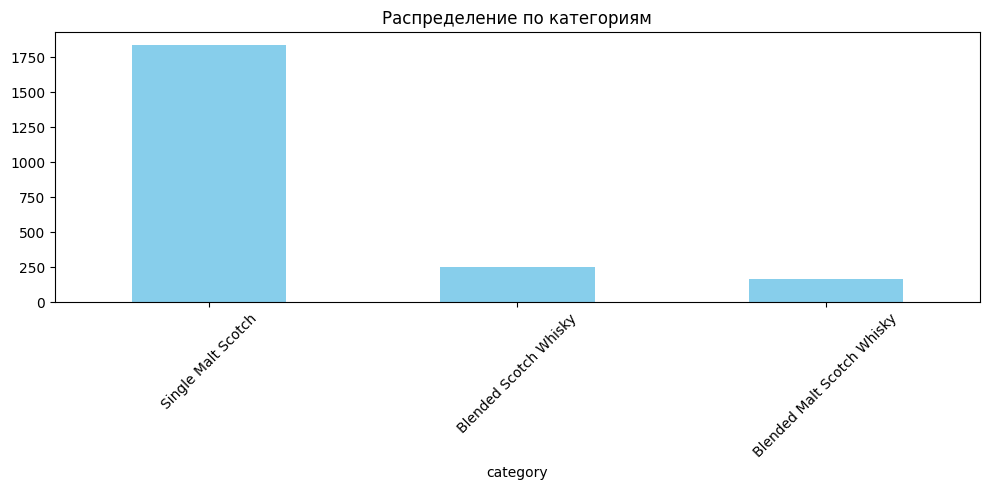


=== АНАЛИЗ ОЦЕНОК ===
Среднее: 88.48
Медиана: 88.00
Стандартное отклонение: 2.95
Диапазон: 83 - 97


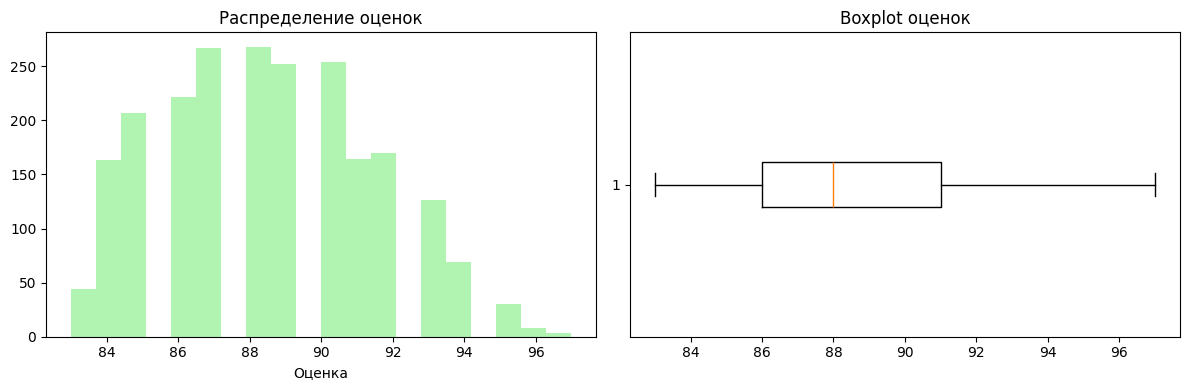


=== АНАЛИЗ ЦЕН ===
Средняя цена: $721.94
Медианная цена: $111.00
Самая дорогая: $157000.00
Самая дешевая: $7.20

Топ-5 самых дорогих:
  Diamond Jubilee by John Walker & Sons, 42.5%
    Цена: $157000.00, Оценка: 93
  The Dalmore 50 year old, 40%
    Цена: $60000.00, Оценка: 93
  Bowmore 50 year old 1966 vintage, 41.5%
    Цена: $30000.00, Оценка: 94
  Balvenie 1971 vintage, 49.9%
    Цена: $27747.00, Оценка: 94
  The Balvenie DCS Compendium 1st Chapter 1968 46 ye...
    Цена: $27620.00, Оценка: 90

=== ВКУСОВЫЕ ПРОФИЛИ ===
Самые популярные вкусы:
  palate: 1331 (59.2%)
  vanilla: 862 (38.4%)
  oak: 837 (37.2%)
  sweet: 722 (32.1%)
  fruit: 707 (31.5%)
  chocolate: 684 (30.4%)
  smoke: 584 (26.0%)
  sherry: 545 (24.3%)


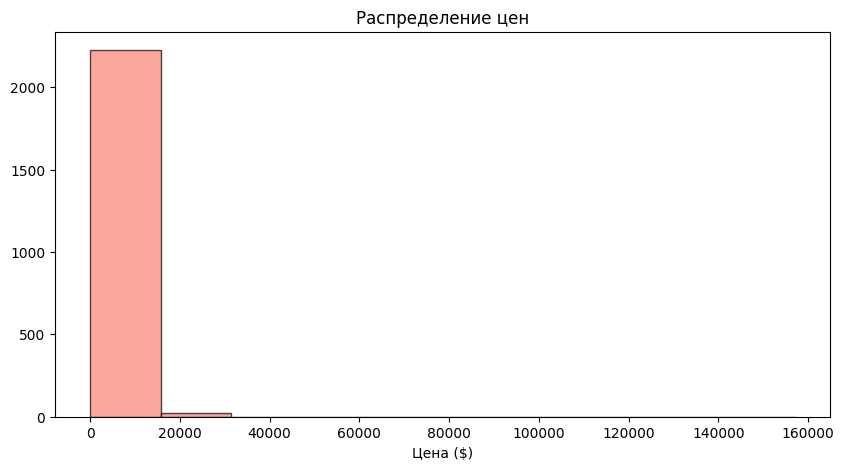

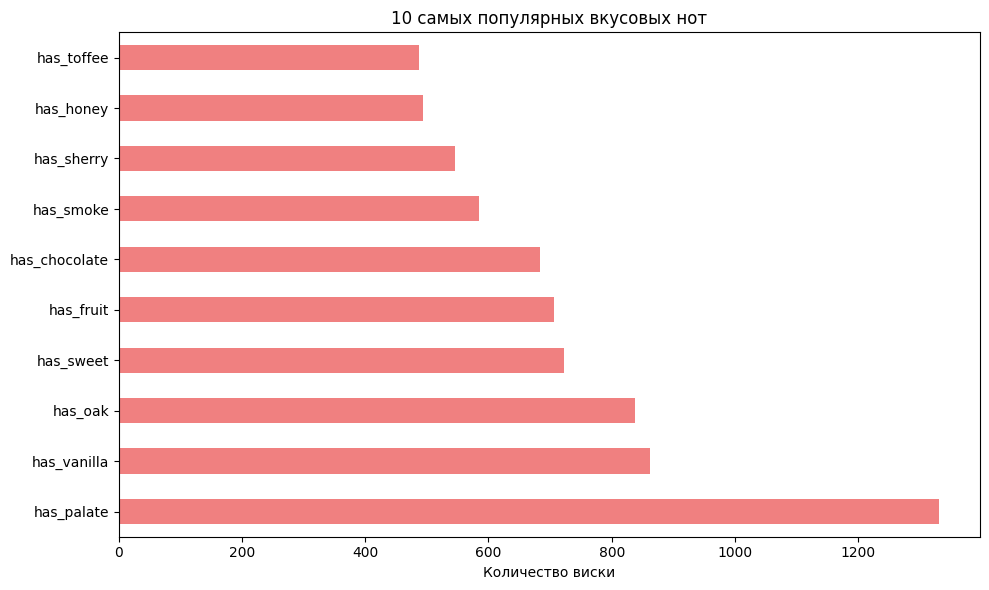


=== Цена - Рейтинг ===
Корреляция цена-оценка: 0.152

Топ-5 по соотношению цена/качество (только для анализа):
  Kirkland, 40%
    Цена: $7.20, Оценка: 84
  Clan MacGregor, 40%
    Цена: $10.00, Оценка: 85
  Carlyle, 40%
    Цена: $13.00, Оценка: 88
  MacQueens of Scotland 3 year old, 40%
    Цена: $13.00, Оценка: 84
  Kirkland 12 year old, 40%
    Цена: $15.60, Оценка: 86


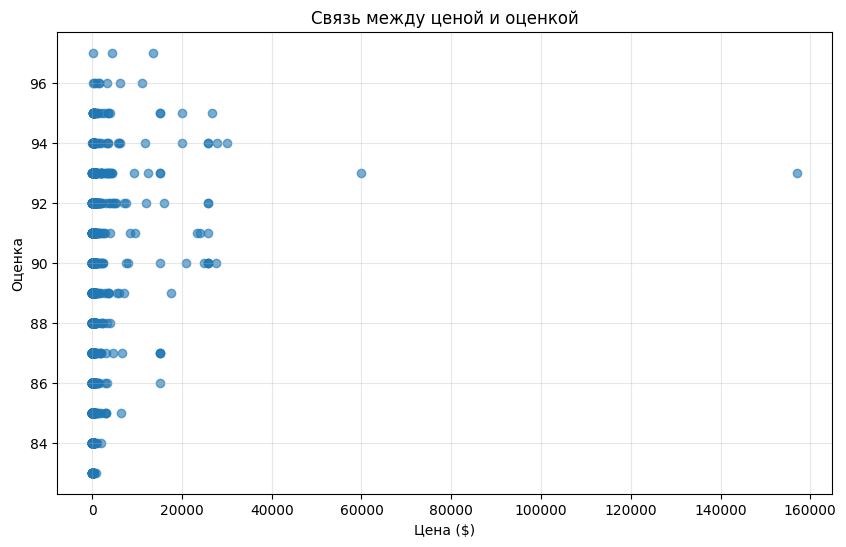

In [2]:
import EDA as eda

analize = eda.whisky_eda(df)


___Isolation Forest___
Обнаружено аномалий: 225
Нормальных образцов: 2022

___Local Outlier Factor___
Обнаружено аномалий: 225
Нормальных образцов: 2022

___One-Class SVM___
Обнаружено аномалий: 234
Нормальных образцов: 2013

___Elliptic Envelope___
Обнаружено аномалий: 225
Нормальных образцов: 2022


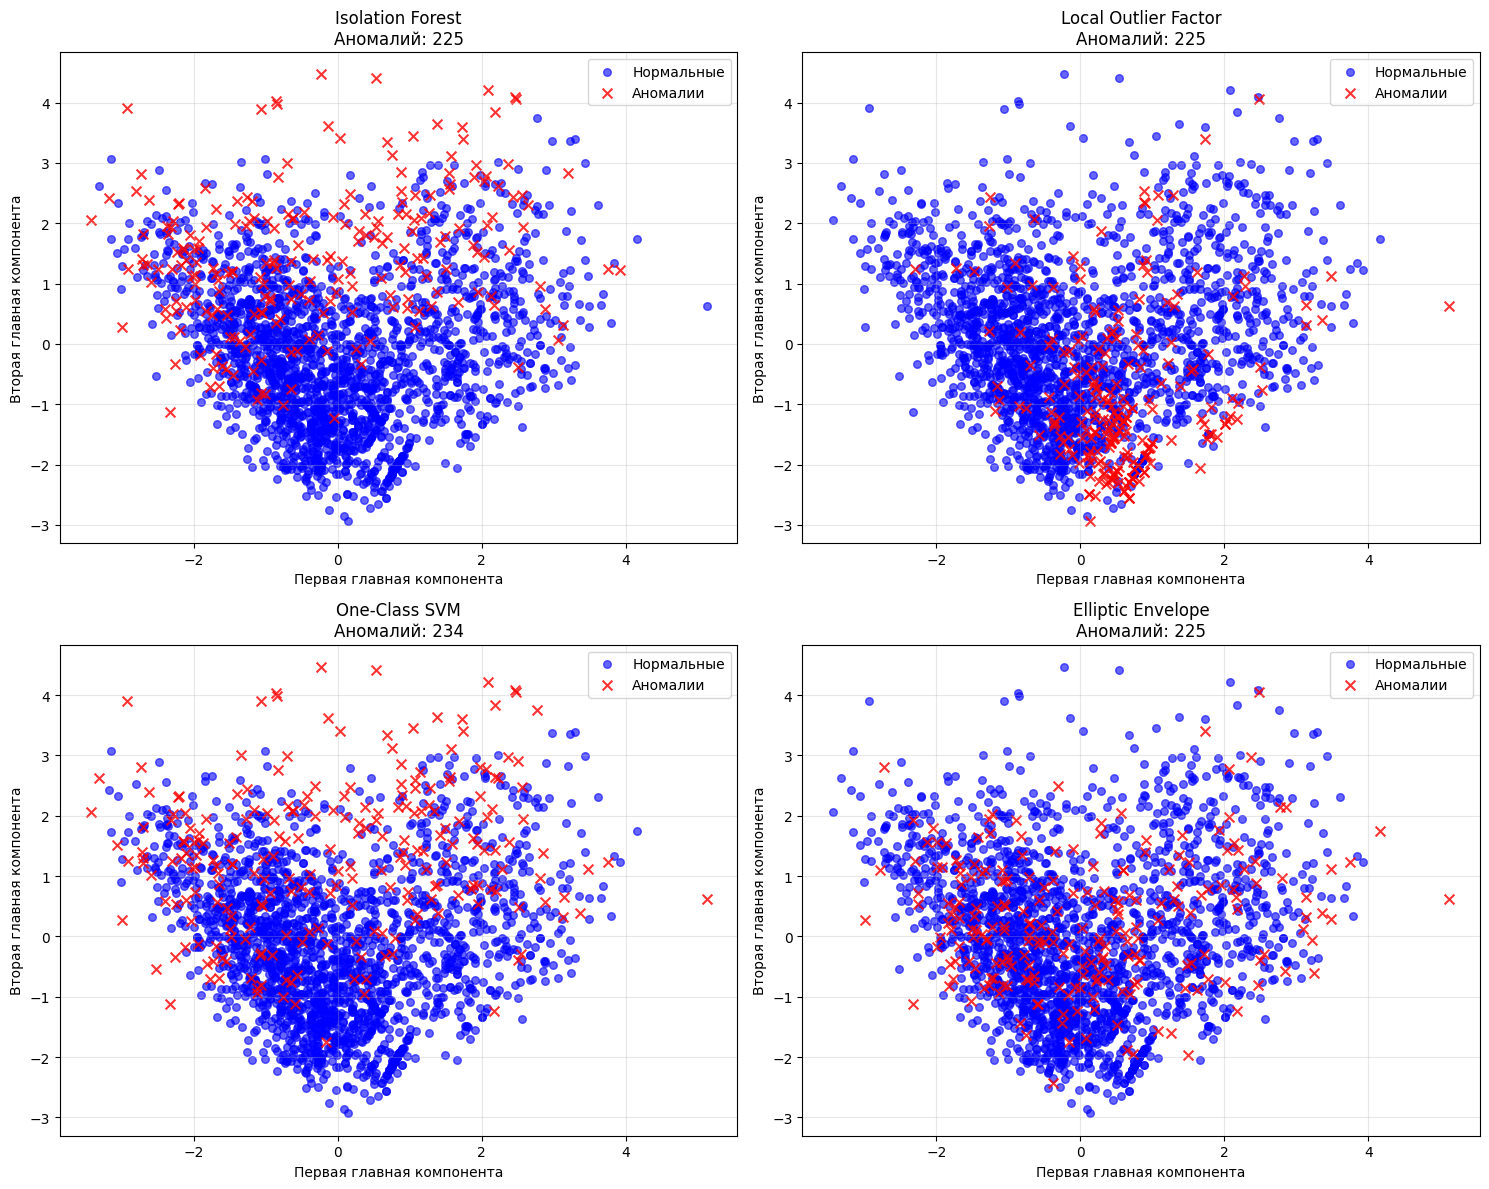


____________________
СРАВНЕНИЕ
____________________
                 Method  Anomalies  Normal  Anomaly Rate
0      Isolation Forest        225    2022         0.100
1  Local Outlier Factor        225    2022         0.100
2         One-Class SVM        234    2013         0.104
3     Elliptic Envelope        225    2022         0.100


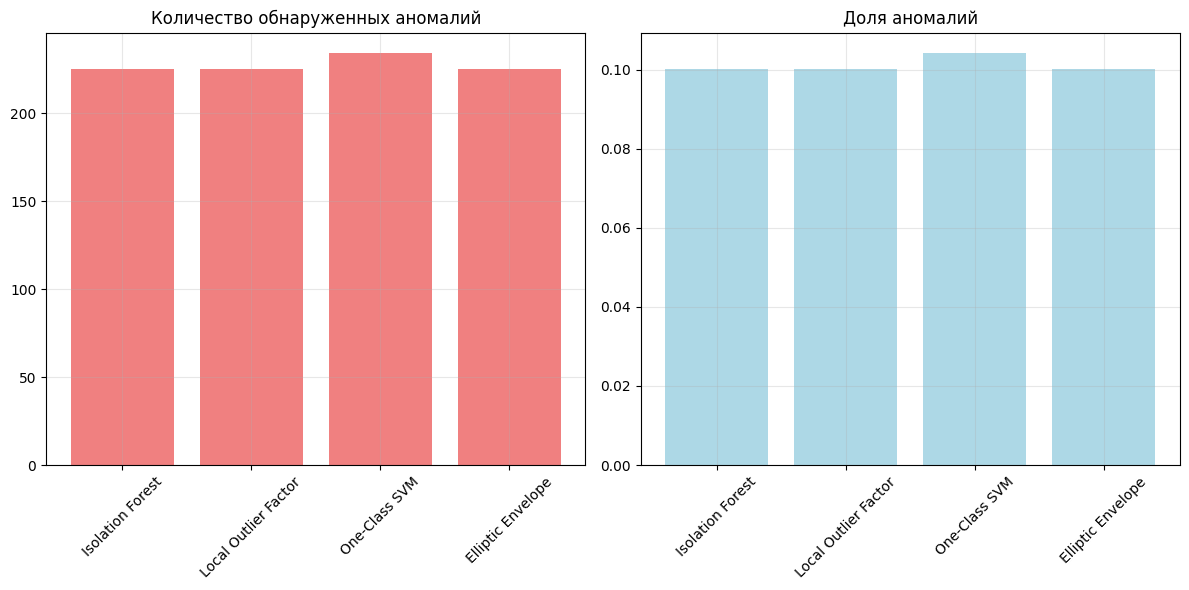

Консенсусные аномалии (согласны >= 3 методов): 87


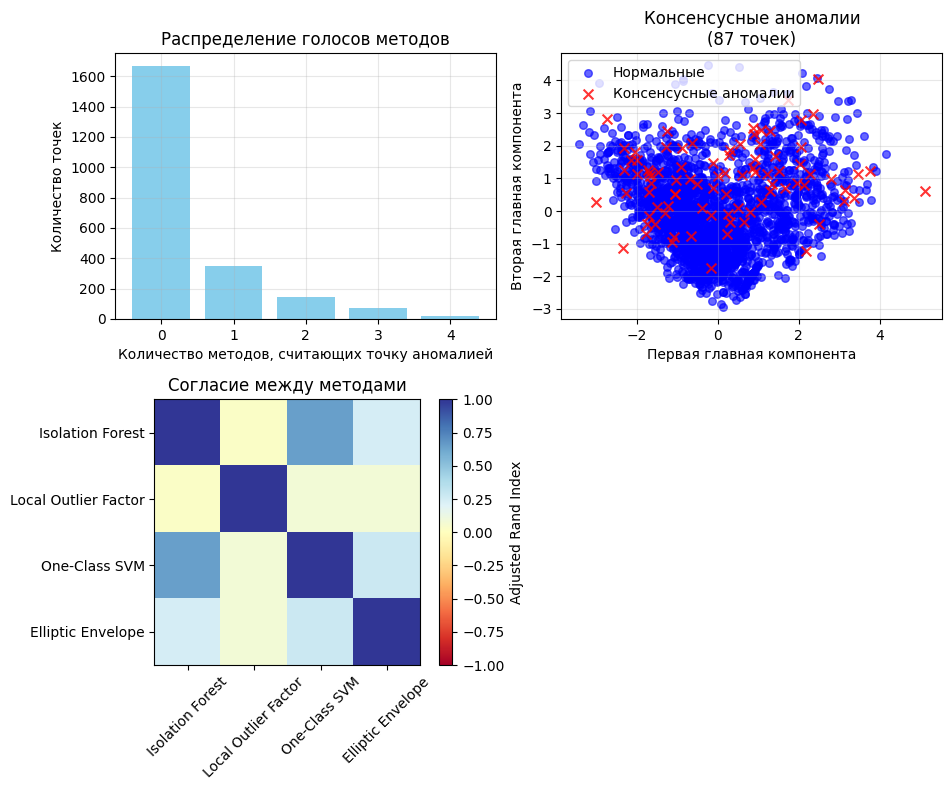

Детальный анализ с использованием One-Class SVM:

Статистика по аномальным и нормальным образцам:
           review.point                  price                            name
                   mean   std min max     mean       std   min       max count
is_anomaly                                                                    
False             88.37  2.86  83  97   377.16   1189.17   7.2   16000.0  2013
True              89.41  3.52  83  97  3687.95  12848.42  22.0  157000.0   234


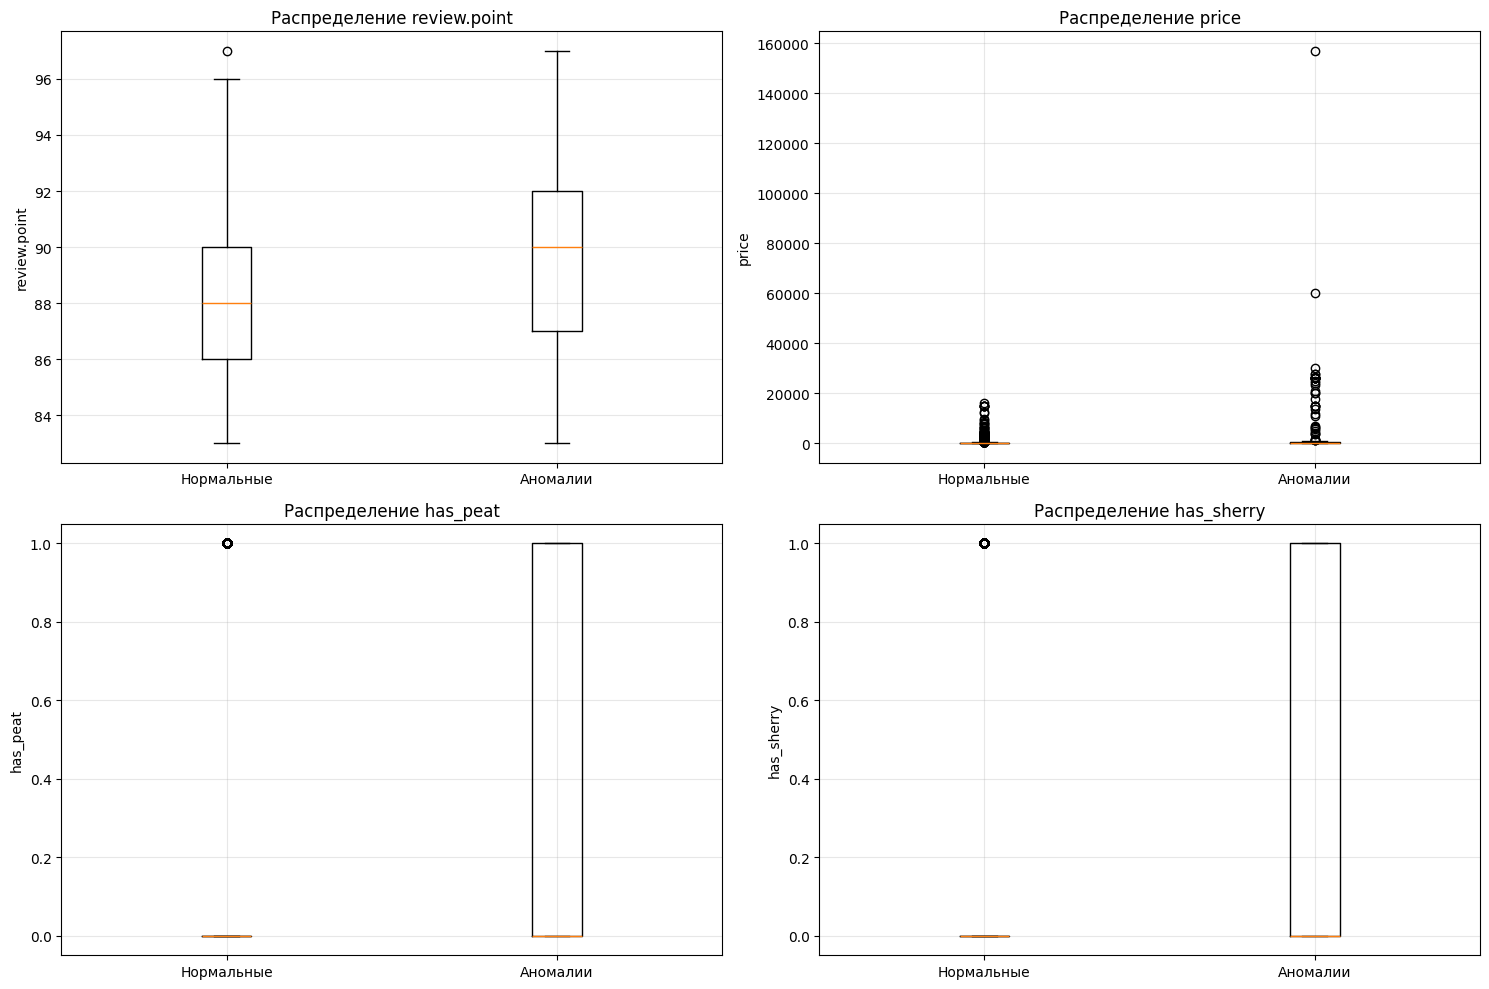


___ТОП АНОМАЛЬНЫХ СКОТЧЕЙ___
Топ аномальных скотчей по цене:
                                                                        name  review.point    price
                                Diamond Jubilee by John Walker & Sons, 42.5%            93 157000.0
                                                The Dalmore 50 year old, 40%            93  60000.0
                                     Bowmore 50 year old 1966 vintage, 41.5%            94  30000.0
                                                Balvenie 1971 vintage, 49.9%            94  27747.0
The Balvenie DCS Compendium 1st Chapter 1968 46 year old (Cask# 7293), 45.9%            90  27620.0
                                 Bowmore 50 year old (distilled 1961), 40.7%            95  26650.0
          Cragganmore Prima & Ultima 48 year old 1971 (Cask No. 2301), 43.7%            94  25899.0
           Port Ellen Prima & Ultima 40 year old 1979 (Cask No. 6422), 51.2%            94  25899.0
                            Lagavulin 

({'Isolation Forest': {'anomalies': array([1, 1, 1, ..., 1, 1, 1]),
   'scores': array([0.04599823, 0.06399201, 0.02253713, ..., 0.15660372, 0.01916141,
          0.02299888]),
   'n_anomalies': np.int64(225),
   'n_normal': np.int64(2022)},
  'Local Outlier Factor': {'anomalies': array([ 1, -1,  1, ...,  1,  1,  1]),
   'scores': array([-1.1738115 , -1.29011397, -1.2003384 , ..., -1.06105926,
          -1.12961193, -1.15902857]),
   'n_anomalies': np.int64(225),
   'n_normal': np.int64(2022)},
  'One-Class SVM': {'anomalies': array([ 1, -1, -1, ...,  1, -1,  1]),
   'scores': array([ 1.38331785e+00, -7.56418086e-05, -1.34729044e+00, ...,
           5.13588866e+00, -2.10450607e-04,  3.33242914e-04]),
   'n_anomalies': np.int64(234),
   'n_normal': np.int64(2013)},
  'Elliptic Envelope': {'anomalies': array([-1, -1, -1, ...,  1,  1,  1]),
   'scores': array([-1.10711673e+03, -1.19494477e+04, -7.46415719e+00, ...,
           1.65947466e+02,  1.44718799e+02,  1.42934322e+02]),
   'n_anoma

In [1]:
from anomaly_detection import run_anomaly_detection
run_anomaly_detection()

=== СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ ===

--- Запуск K-Means ---
=== K-MEANS КЛАСТЕРИЗАЦИЯ ===


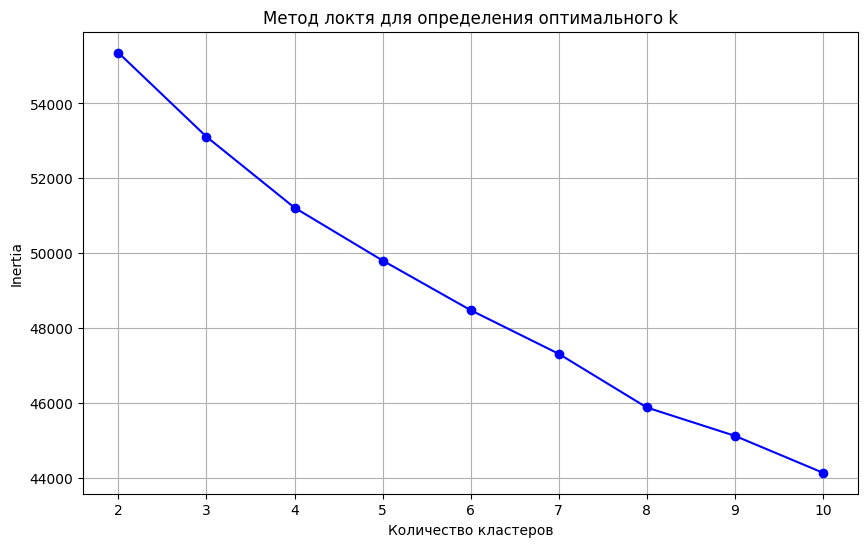

Оптимальное число кластеров: 4
Silhouette Score: 0.062
Calinski-Harabasz Score: 105.160
Davies-Bouldin Score: 3.401


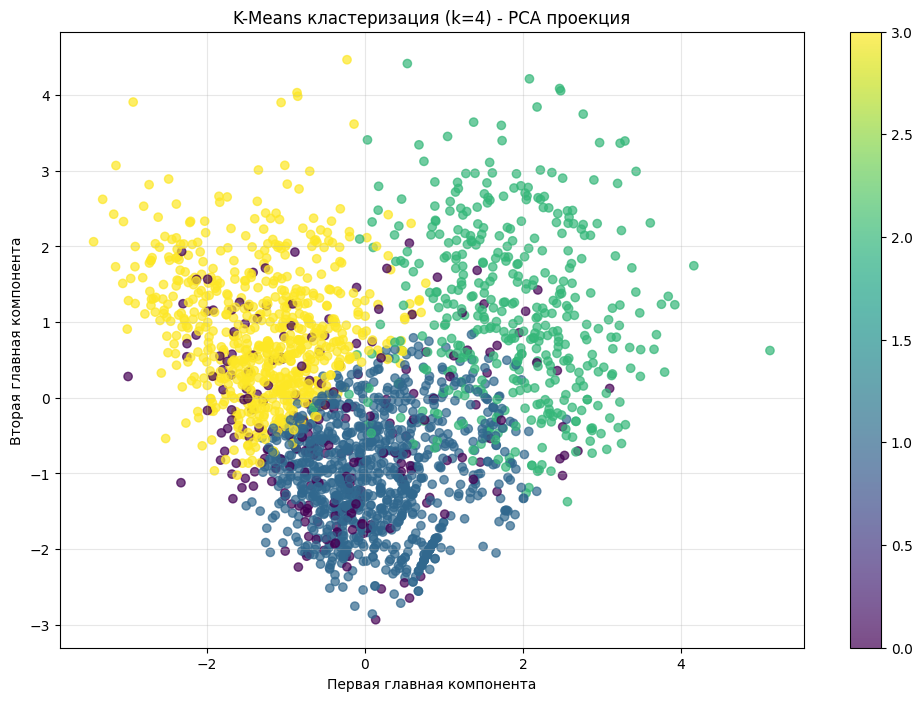

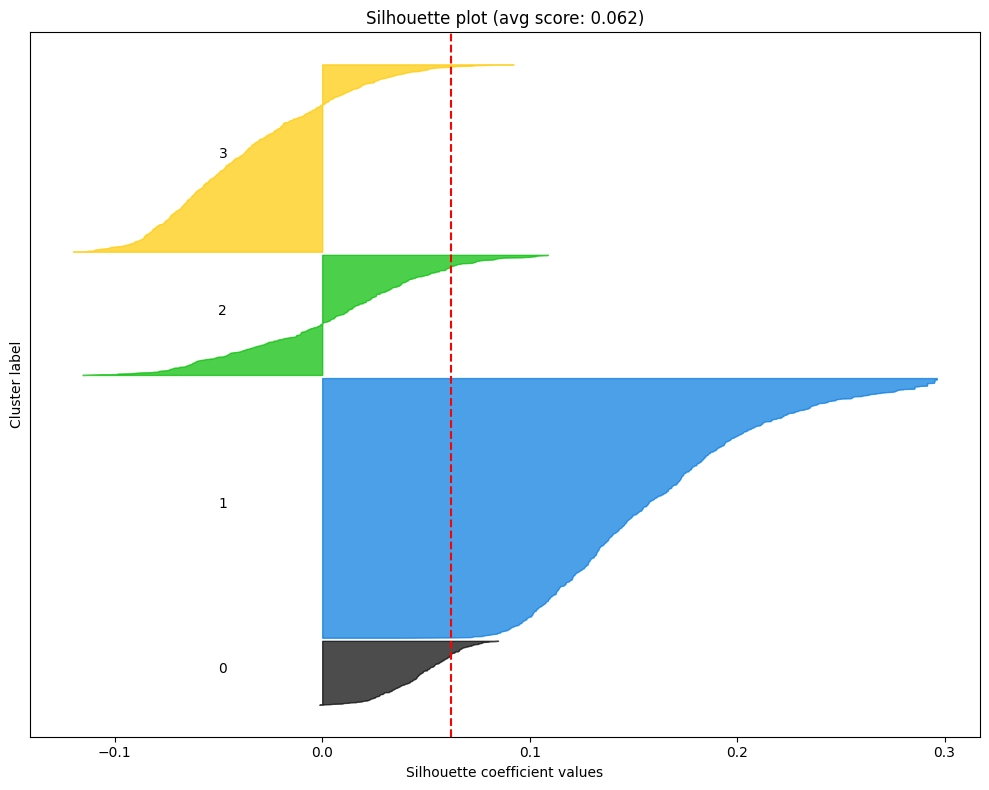


Анализ центроидов кластеров:


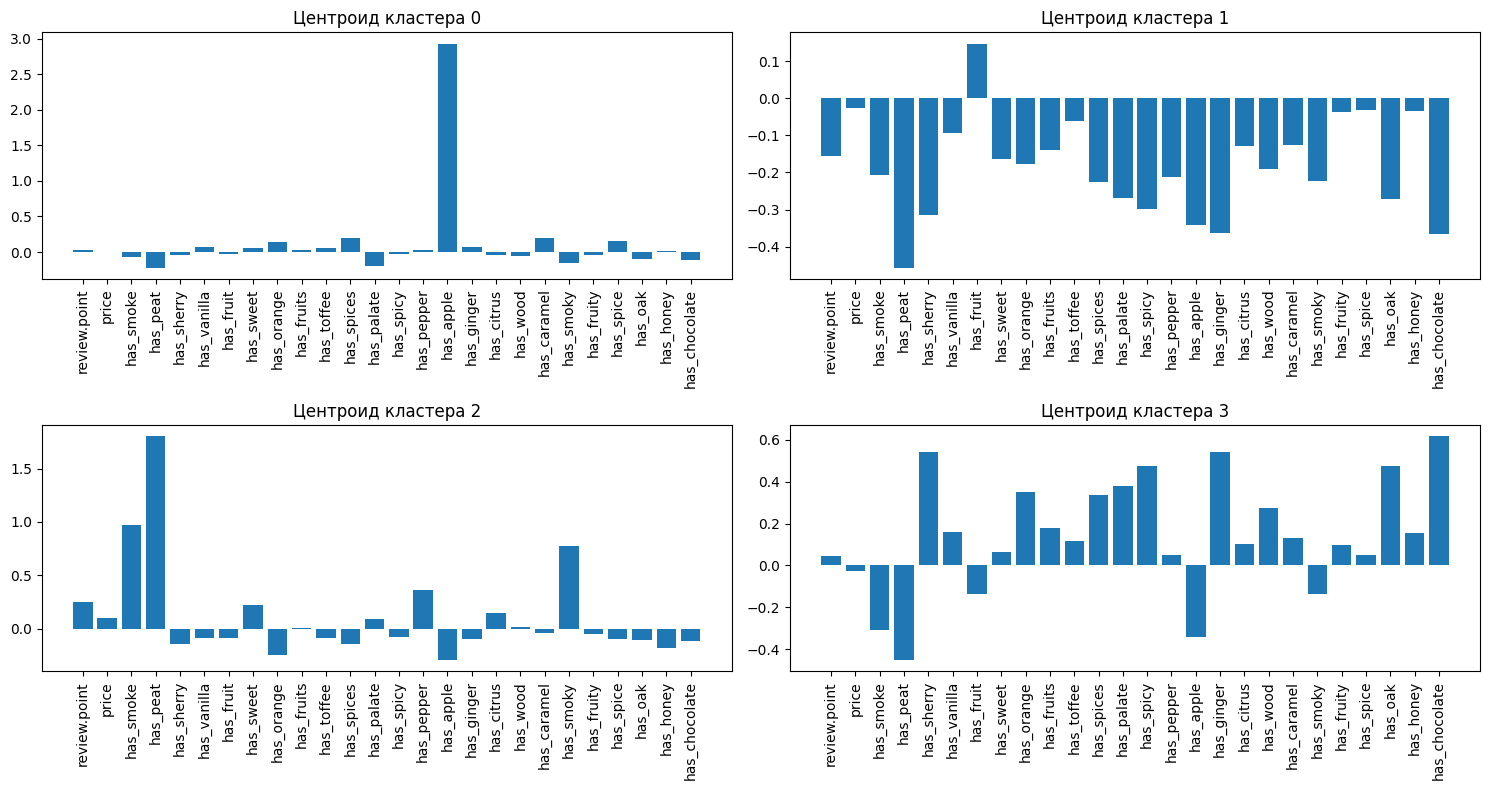


Статистика по кластерам:
        review.point          price           name
                mean   std     mean      std count
cluster                                           
0              88.54  2.91   749.57  3217.93   228
1              88.02  2.96   602.33  3030.69   924
2              89.22  2.96  1140.76  8209.14   428
3              88.61  2.83   609.45  2421.83   667
✓ K-Means завершен успешно

--- Запуск Agglomerative ---
=== АГЛОМЕРАТИВНАЯ КЛАСТЕРИЗАЦИЯ ===


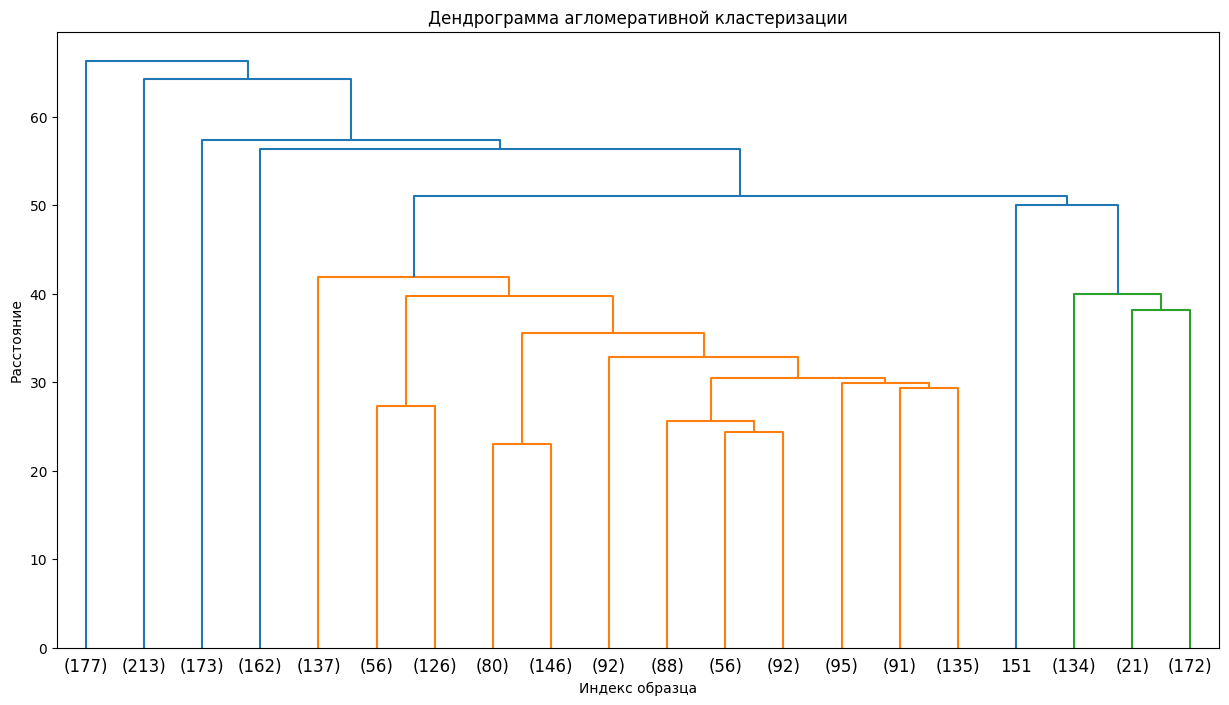

Число кластеров: 4
Silhouette Score: 0.089
Calinski-Harabasz Score: 84.061
Davies-Bouldin Score: 2.796


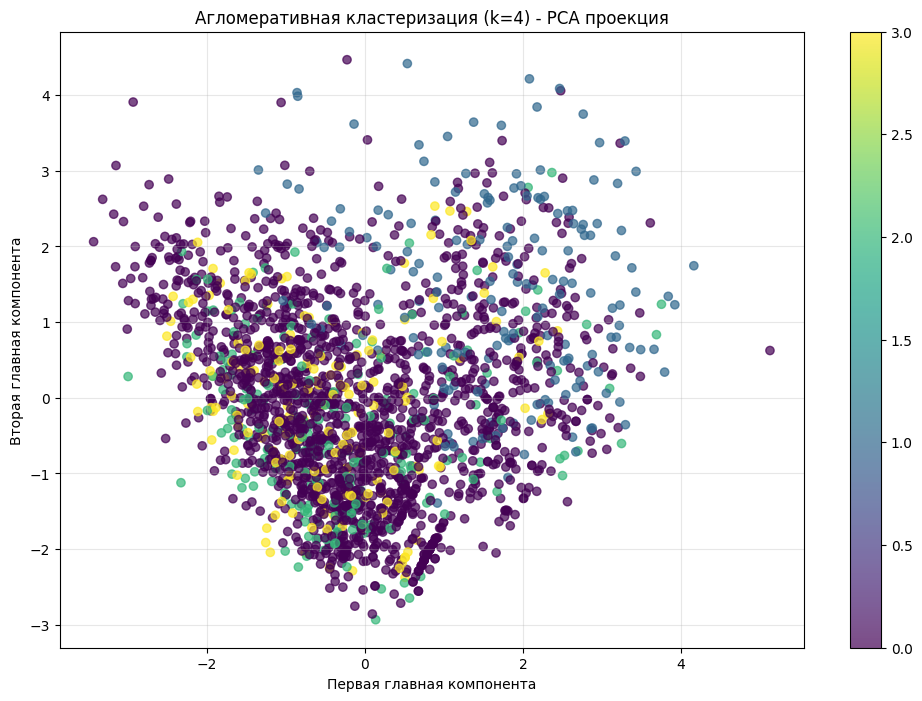

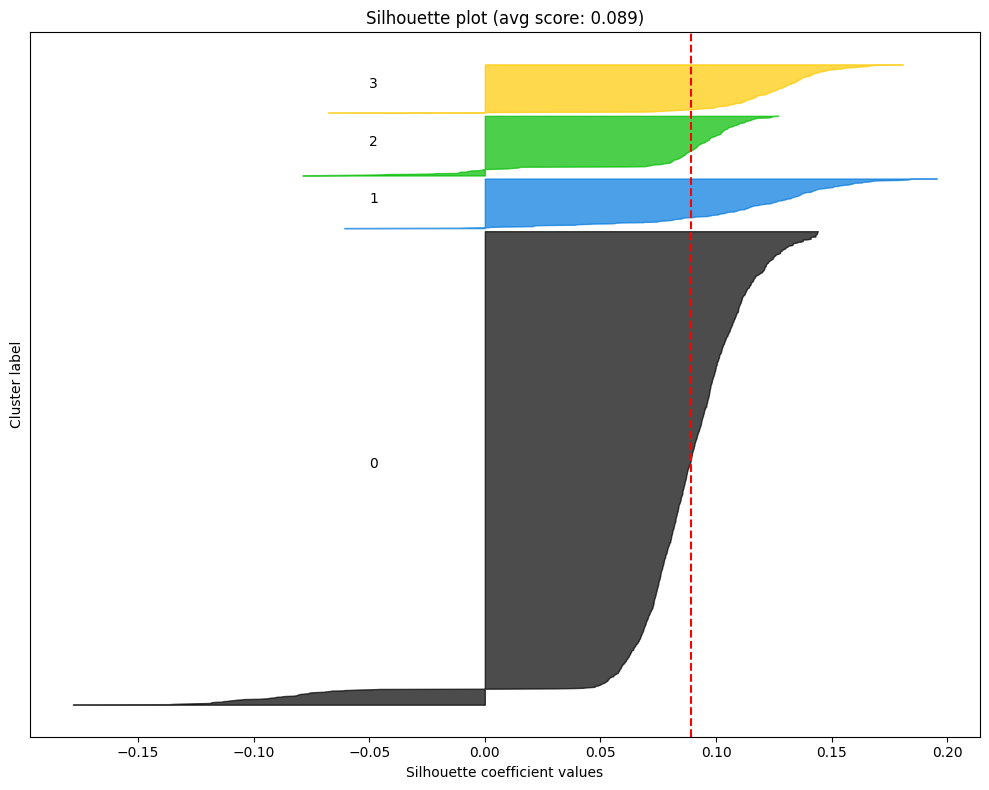

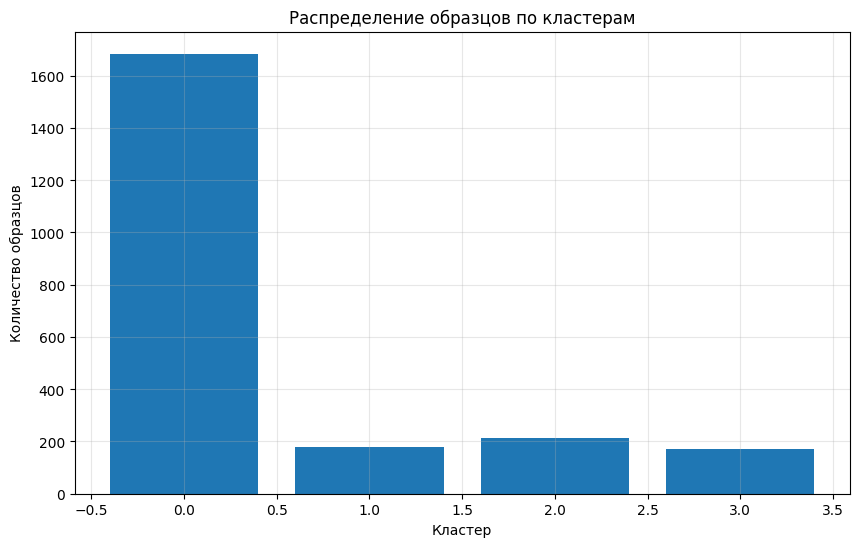


Распределение по кластерам:
Кластер 0: 1684 образцов
Кластер 1: 177 образцов
Кластер 2: 213 образцов
Кластер 3: 173 образцов
✓ Agglomerative завершен успешно

--- Запуск Autoencoder ---
=== AUTOENCODER КЛАСТЕРИЗАЦИЯ ===


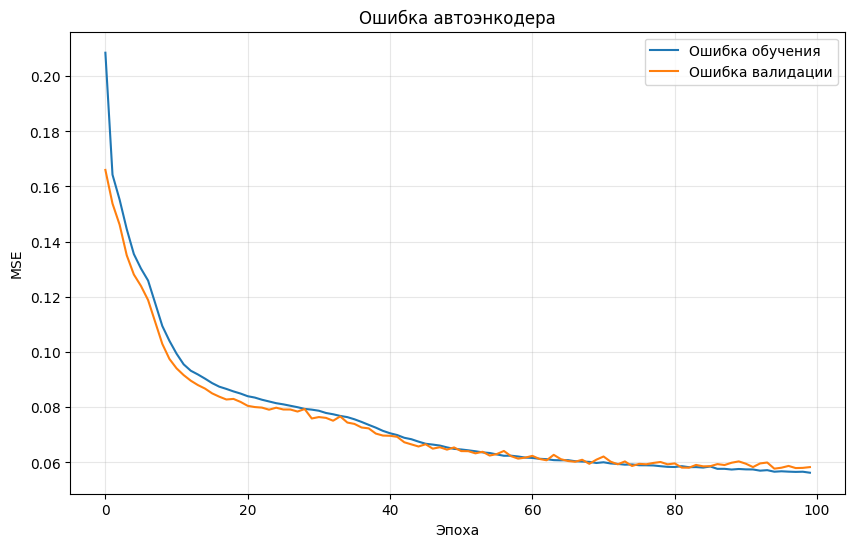

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Silhouette Score: 0.160
Calinski-Harabasz Score: 580.853
Davies-Bouldin Score: 1.892


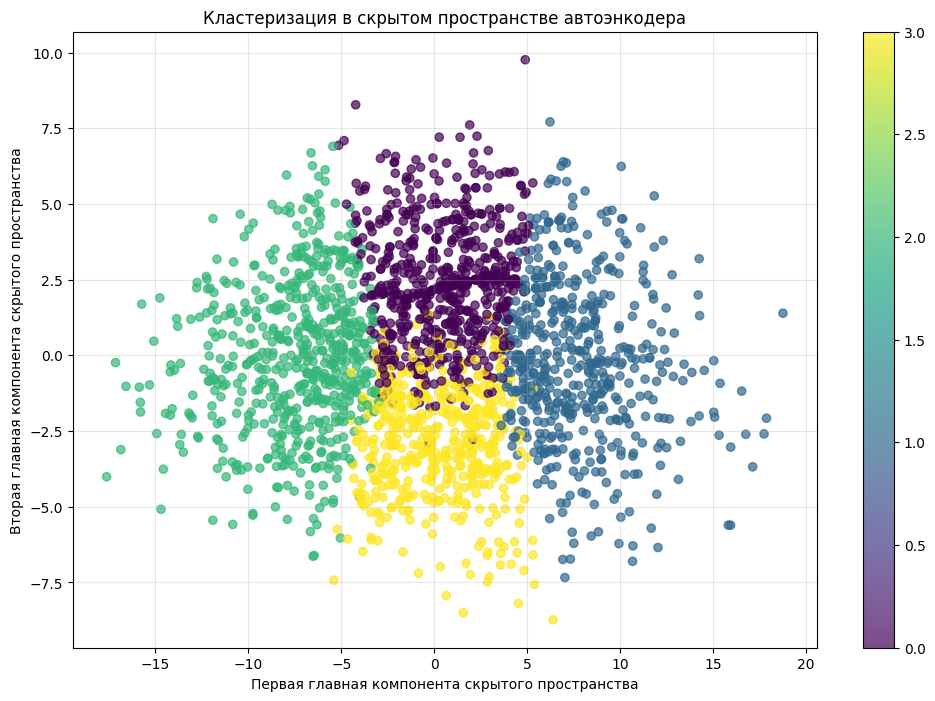

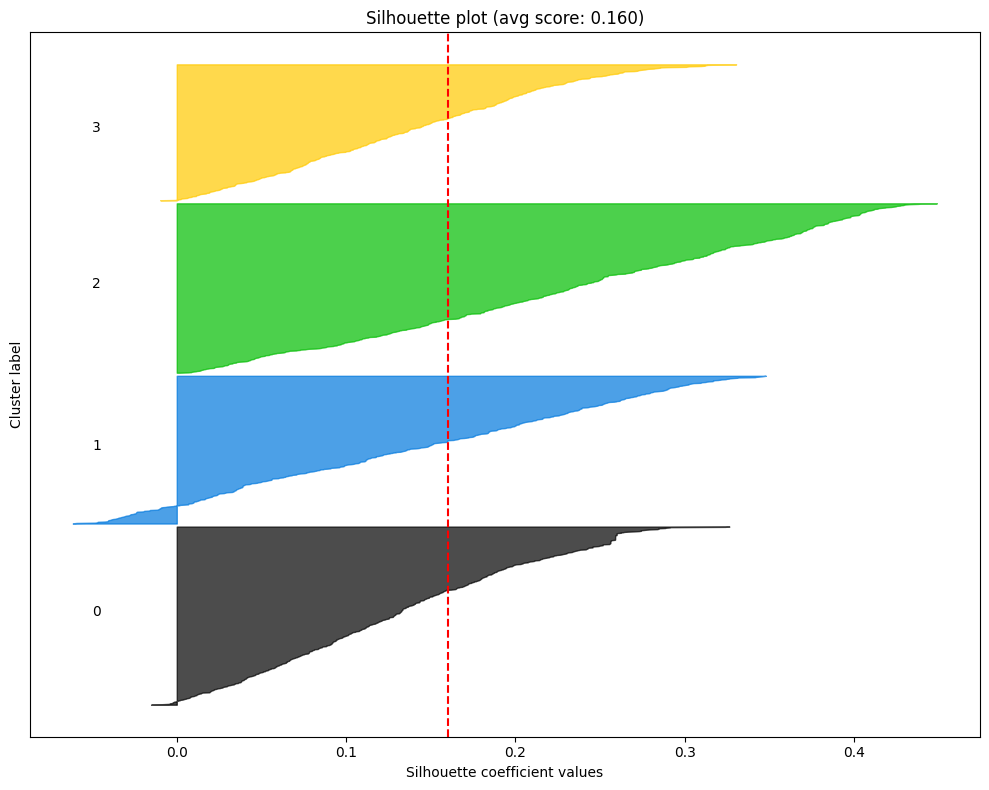

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


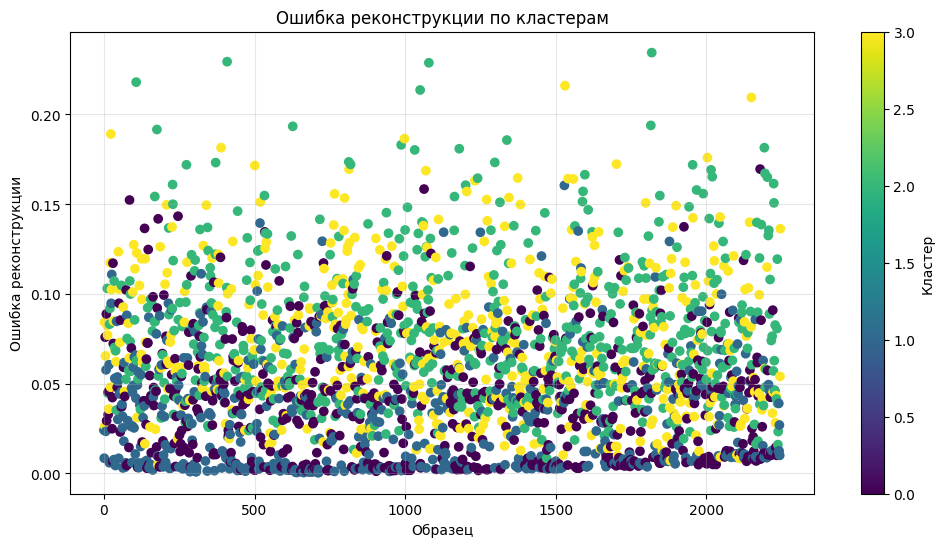

✓ Autoencoder завершен успешно

--- Запуск Affinity Propagation ---
=== AFFINITY PROPAGATION КЛАСТЕРИЗАЦИЯ ===
Исходная размерность: 26
Размерность после PCA: 24
Количество кластеров: 186
Silhouette Score: 0.065
Calinski-Harabasz Score: 15.693
Davies-Bouldin Score: 1.908


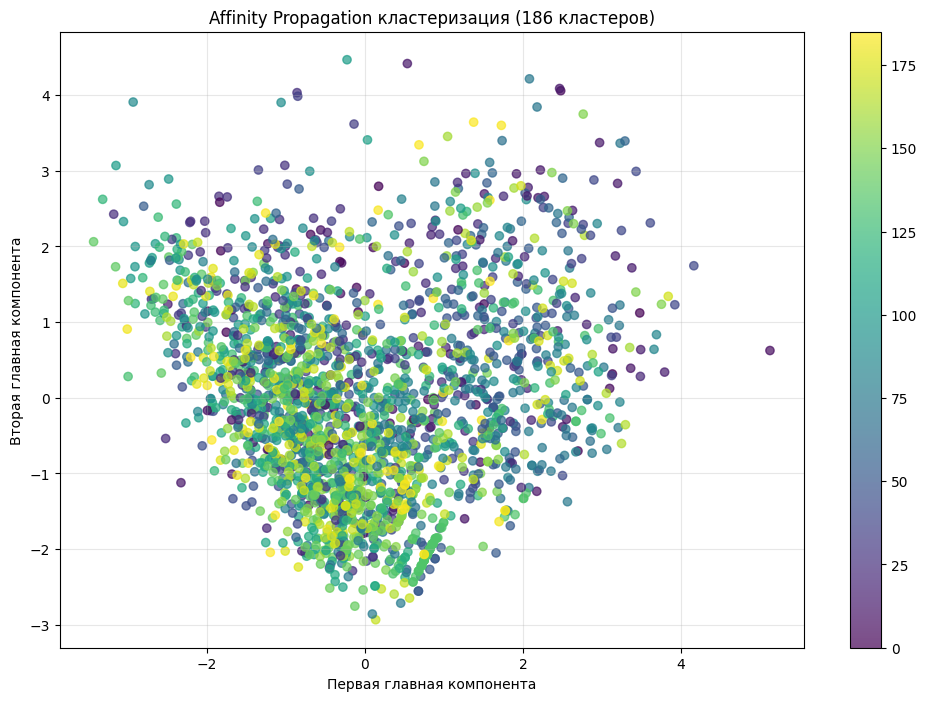

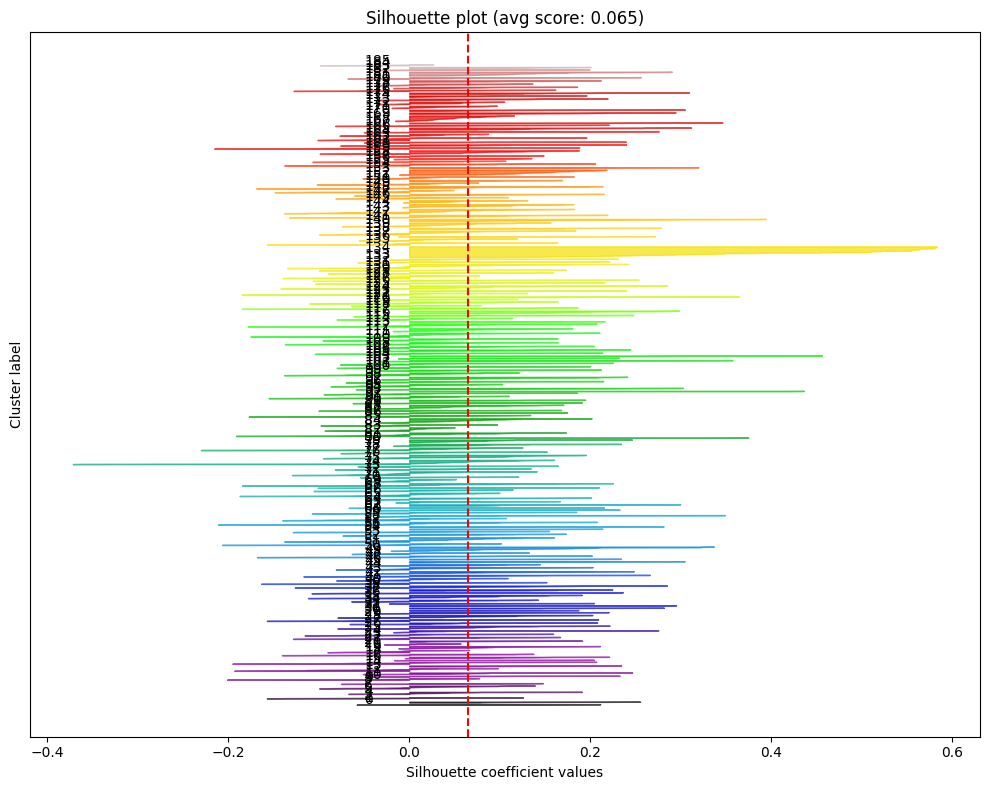


Количество экземпляров-прототипов: 186


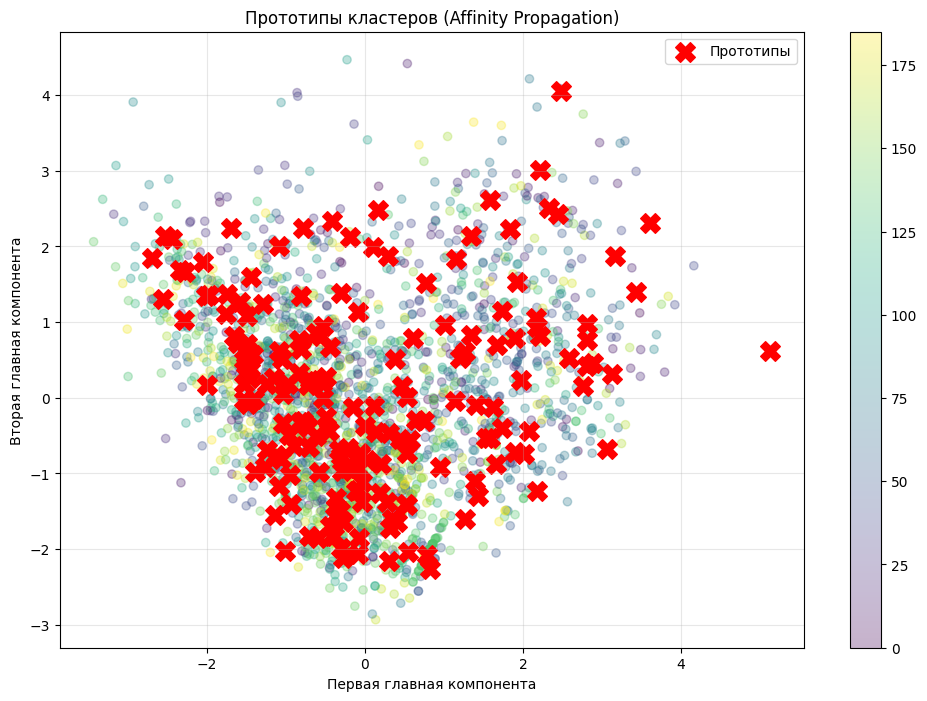

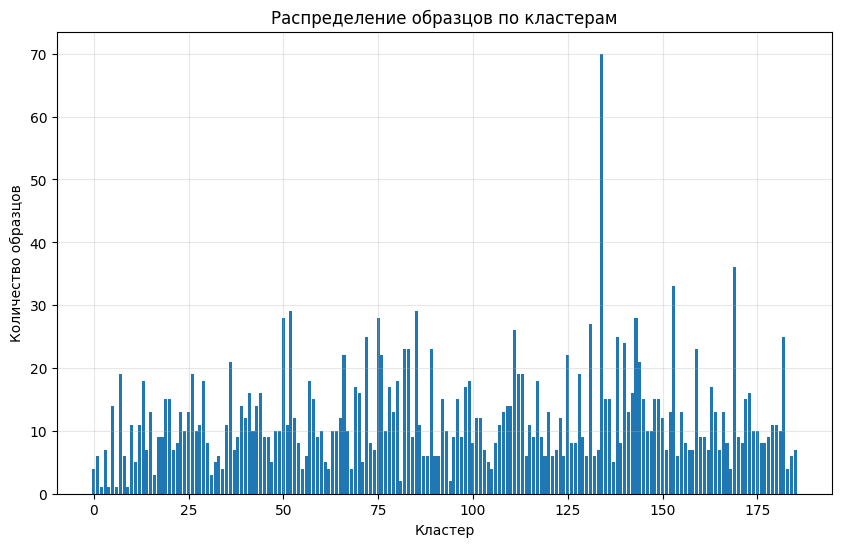


Распределение по кластерам:
Кластер 0: 4 образцов
Кластер 1: 6 образцов
Кластер 2: 1 образцов
Кластер 3: 7 образцов
Кластер 4: 1 образцов
Кластер 5: 14 образцов
Кластер 6: 1 образцов
Кластер 7: 19 образцов
Кластер 8: 6 образцов
Кластер 9: 1 образцов
Кластер 10: 11 образцов
Кластер 11: 5 образцов
Кластер 12: 11 образцов
Кластер 13: 18 образцов
Кластер 14: 7 образцов
Кластер 15: 13 образцов
Кластер 16: 3 образцов
Кластер 17: 9 образцов
Кластер 18: 9 образцов
Кластер 19: 15 образцов
Кластер 20: 15 образцов
Кластер 21: 7 образцов
Кластер 22: 8 образцов
Кластер 23: 13 образцов
Кластер 24: 10 образцов
Кластер 25: 13 образцов
Кластер 26: 19 образцов
Кластер 27: 10 образцов
Кластер 28: 11 образцов
Кластер 29: 18 образцов
Кластер 30: 8 образцов
Кластер 31: 3 образцов
Кластер 32: 5 образцов
Кластер 33: 6 образцов
Кластер 34: 4 образцов
Кластер 35: 11 образцов
Кластер 36: 21 образцов
Кластер 37: 7 образцов
Кластер 38: 9 образцов
Кластер 39: 14 образцов
Кластер 40: 12 образцов
Кластер 41: 16 обра

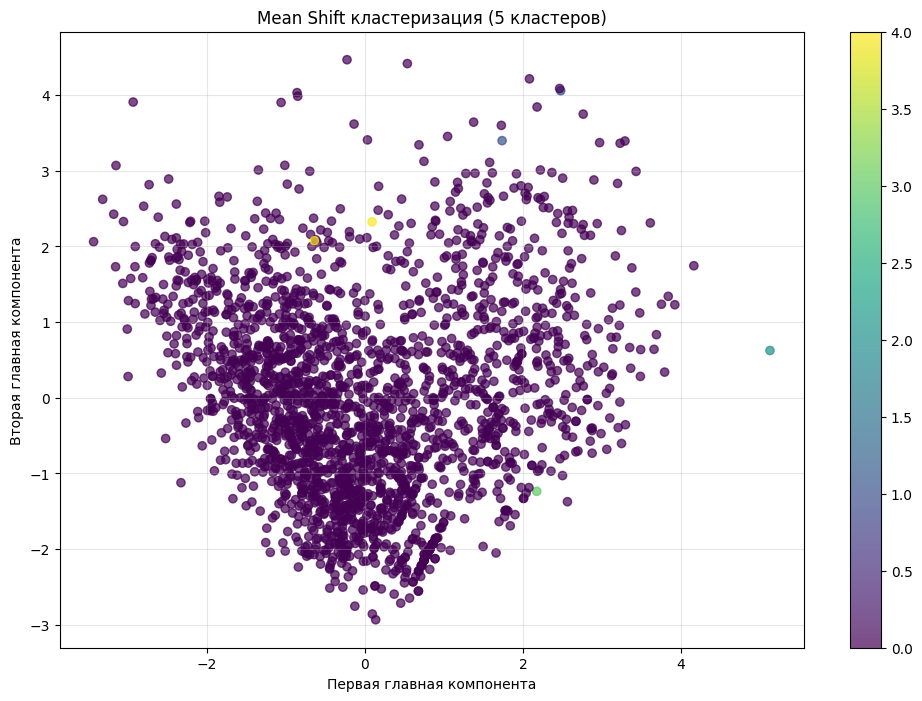

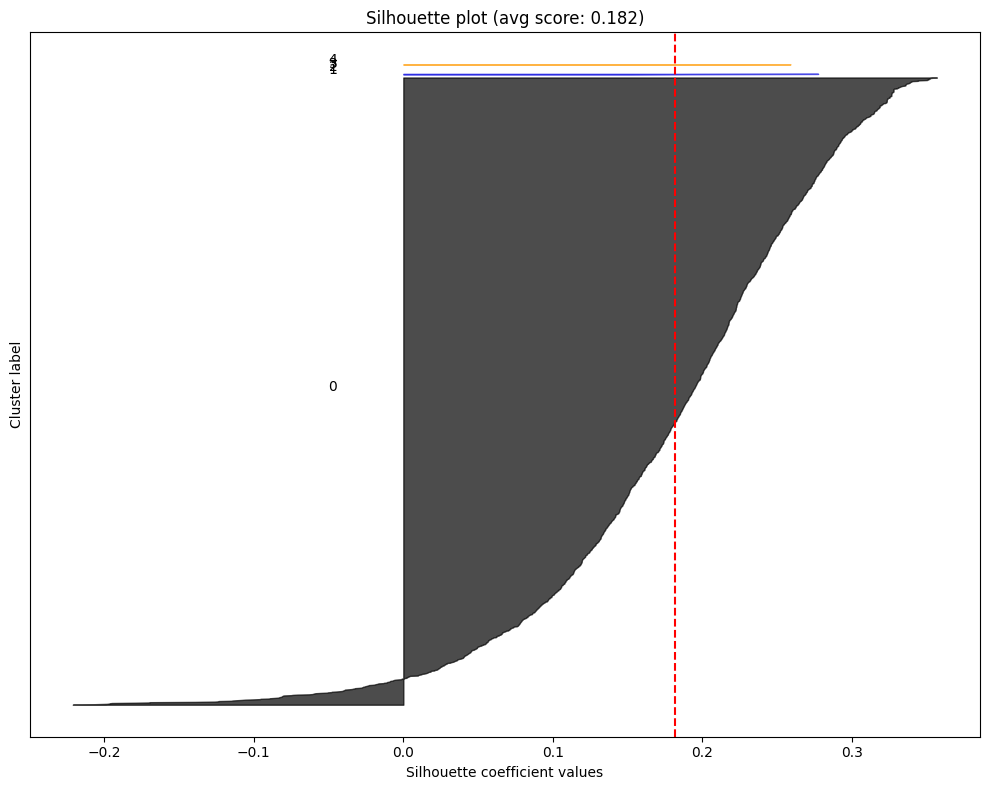

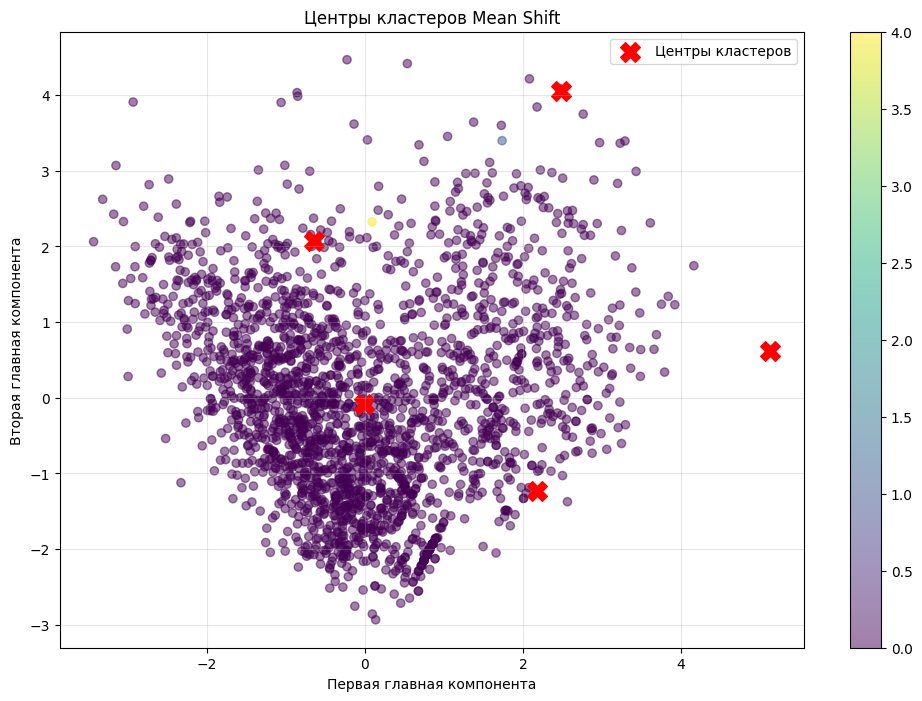

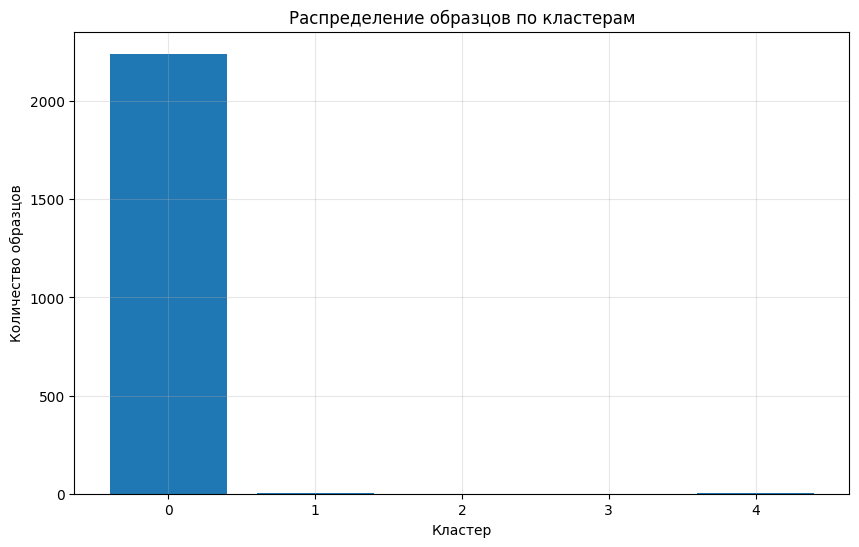


Распределение по кластерам:
Кластер 0: 2240 образцов
Кластер 1: 3 образцов
Кластер 2: 1 образцов
Кластер 3: 1 образцов
Кластер 4: 2 образцов
✓ Mean Shift завершен успешно

--- Запуск Ensemble ---
=== АНСАМБЛЕВАЯ КЛАСТЕРИЗАЦИЯ ===


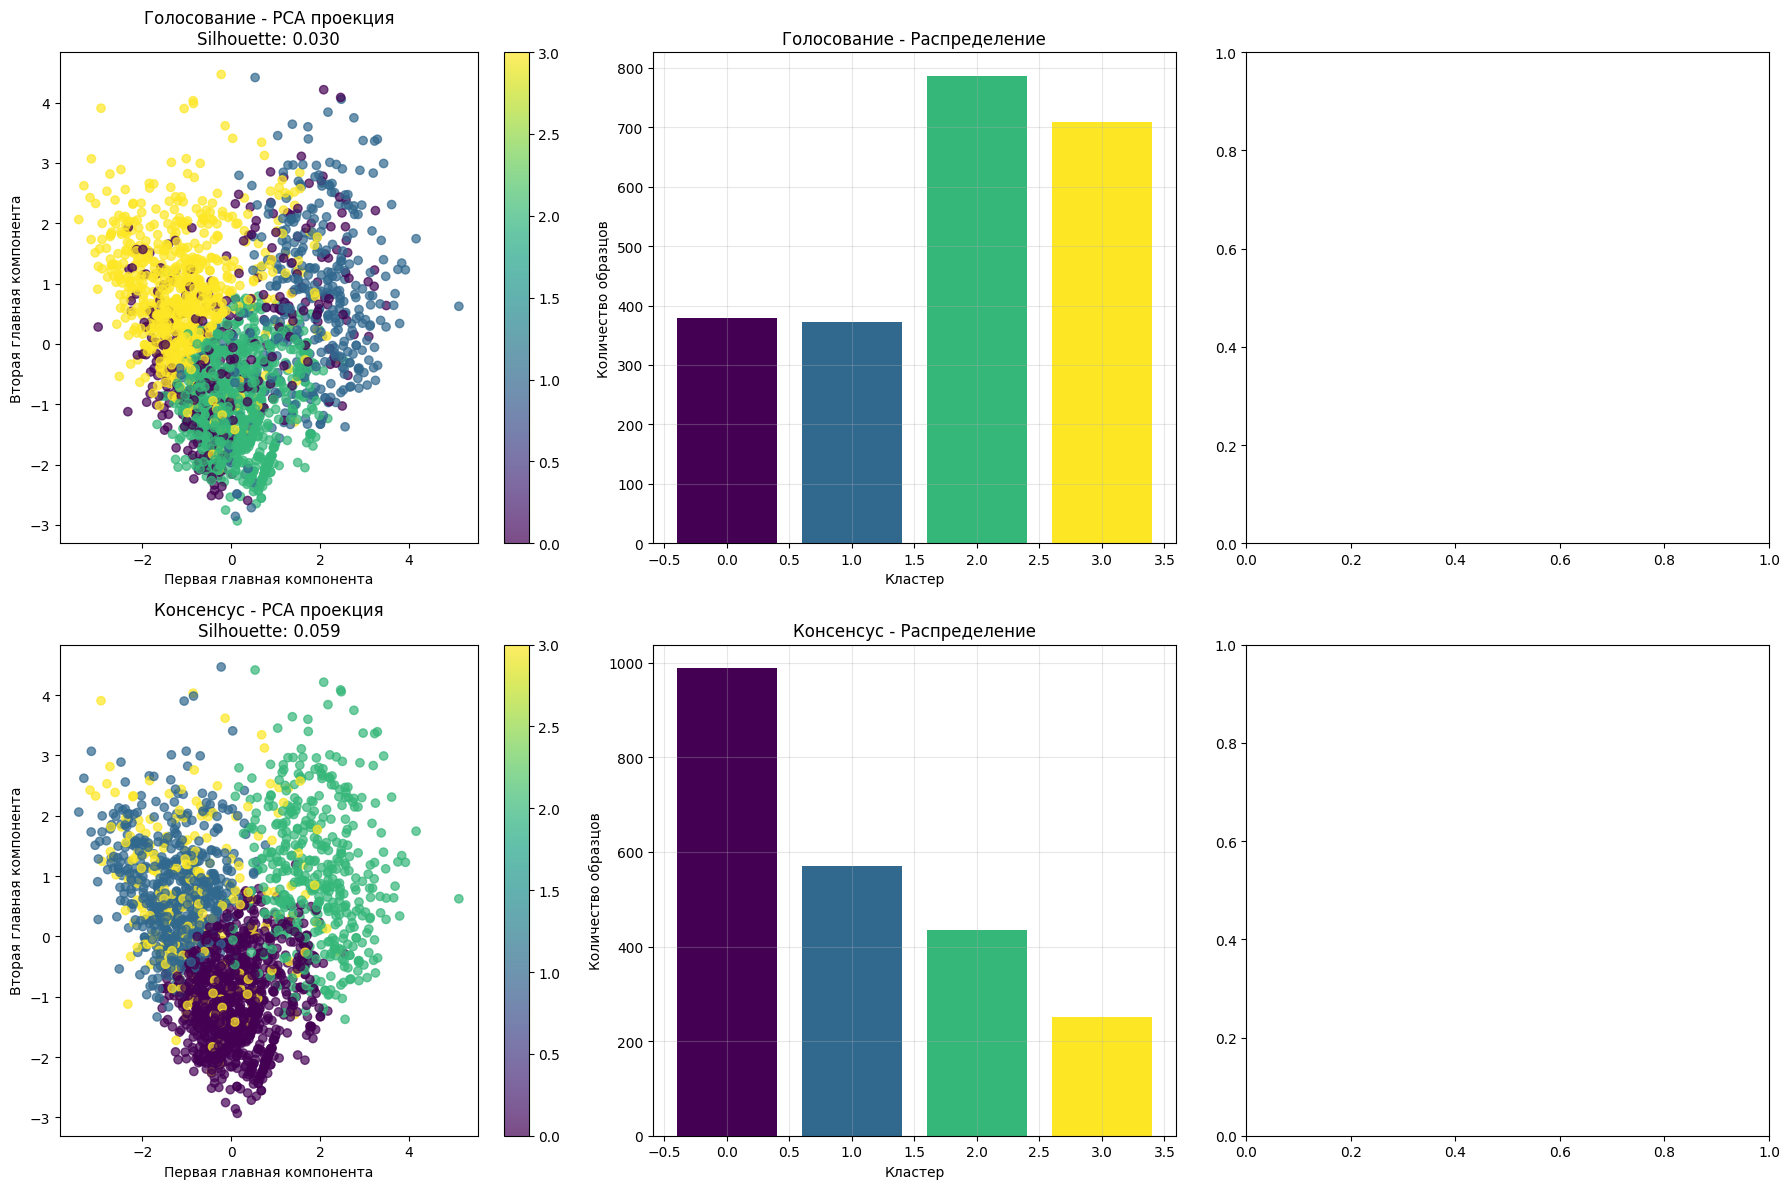


Результаты ансамблевых методов:
Голосование:
  Silhouette: 0.030
  Calinski-Harabasz: 73.606
  Davies-Bouldin: 4.283
  Кластеров: 4
Консенсус:
  Silhouette: 0.059
  Calinski-Harabasz: 91.706
  Davies-Bouldin: 3.656
  Кластеров: 4

Лучший метод: Консенсус (Silhouette: 0.059)

Детальный анализ метода 'Консенсус':


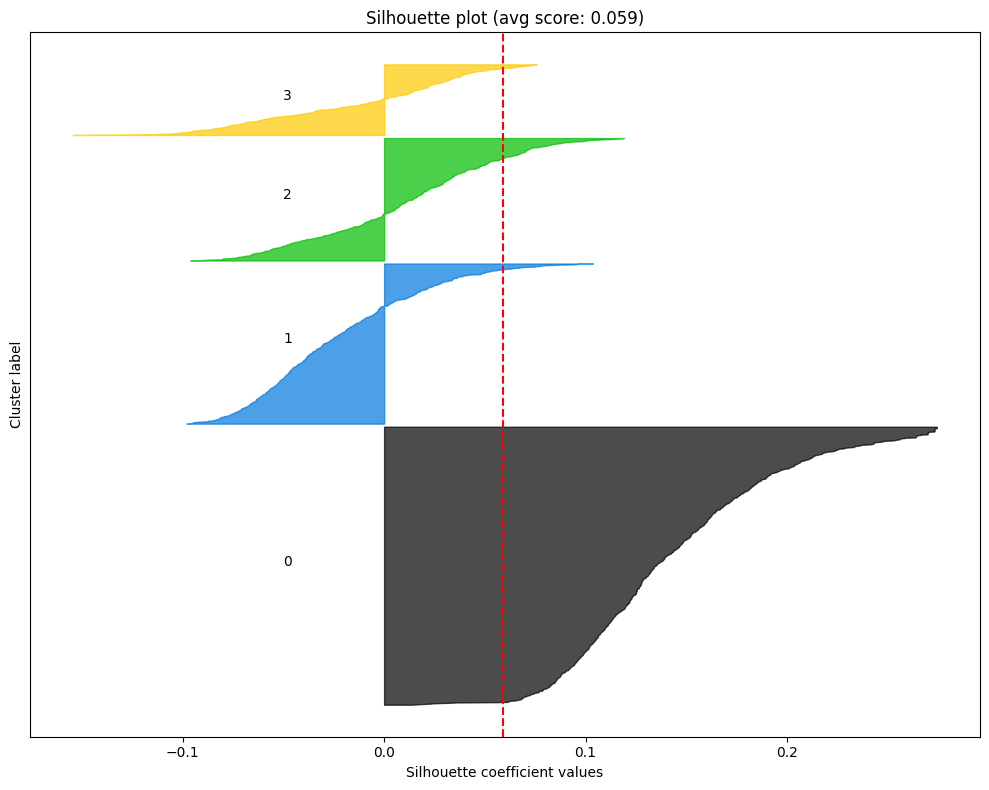


Анализ согласованности базовых кластеризаторов:


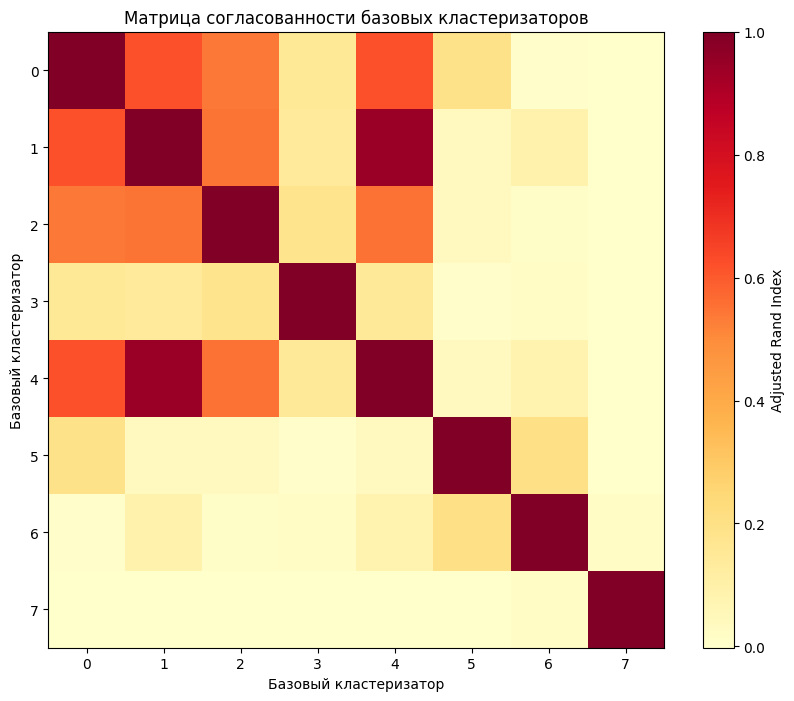

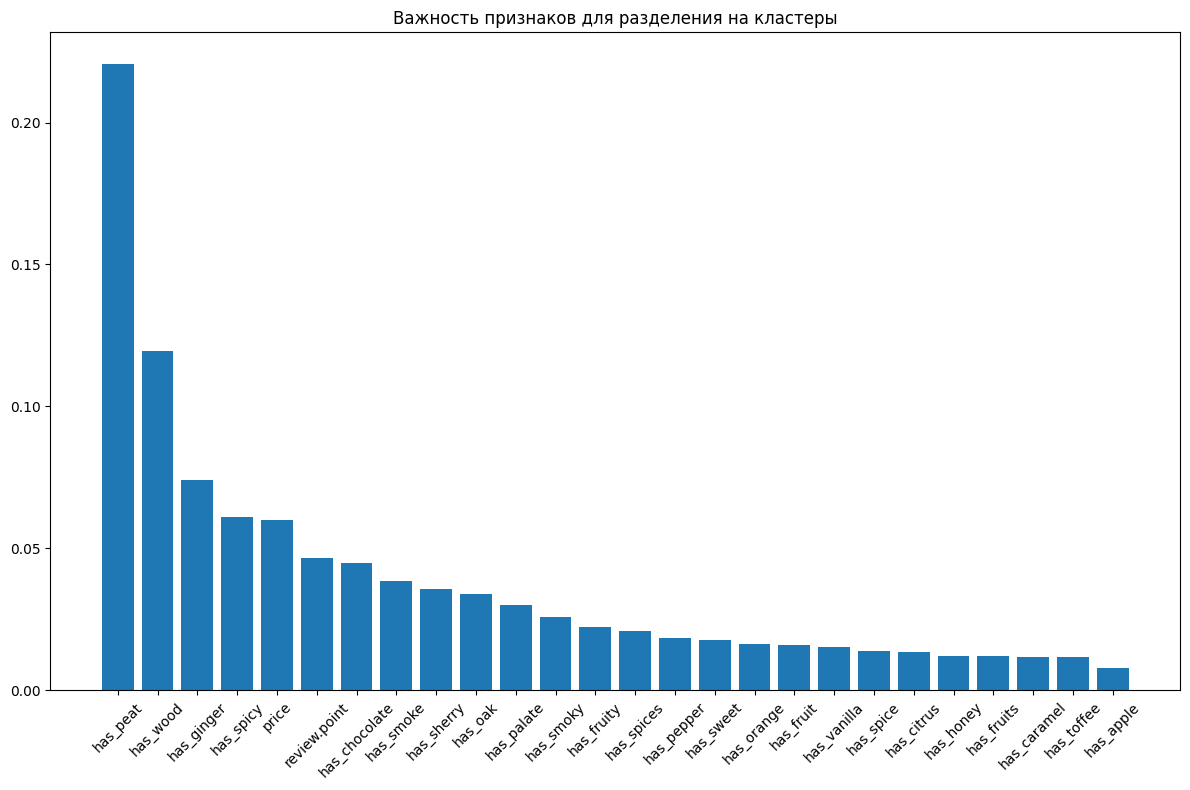


Статистика по кластерам:
                 review.point                  price           has_smoke  \
                         mean    std count      mean       std      mean   
ensemble_cluster                                                           
0                      88.114  3.003   989   633.157  3085.120     0.175   
1                      88.458  2.850   570   509.916  2159.221     0.091   
2                      89.268  2.906   436  1217.278  8203.623     0.700   
3                      88.579  2.768   252   692.958  2916.288     0.214   

                 has_peat has_sherry has_vanilla has_fruit  ... has_ginger  \
                     mean       mean        mean      mean  ...       mean   
ensemble_cluster                                            ...              
0                   0.009      0.121       0.346     0.374  ...      0.039   
1                   0.021      0.449       0.465     0.249  ...      0.465   
2                   0.878      0.179       0.351   

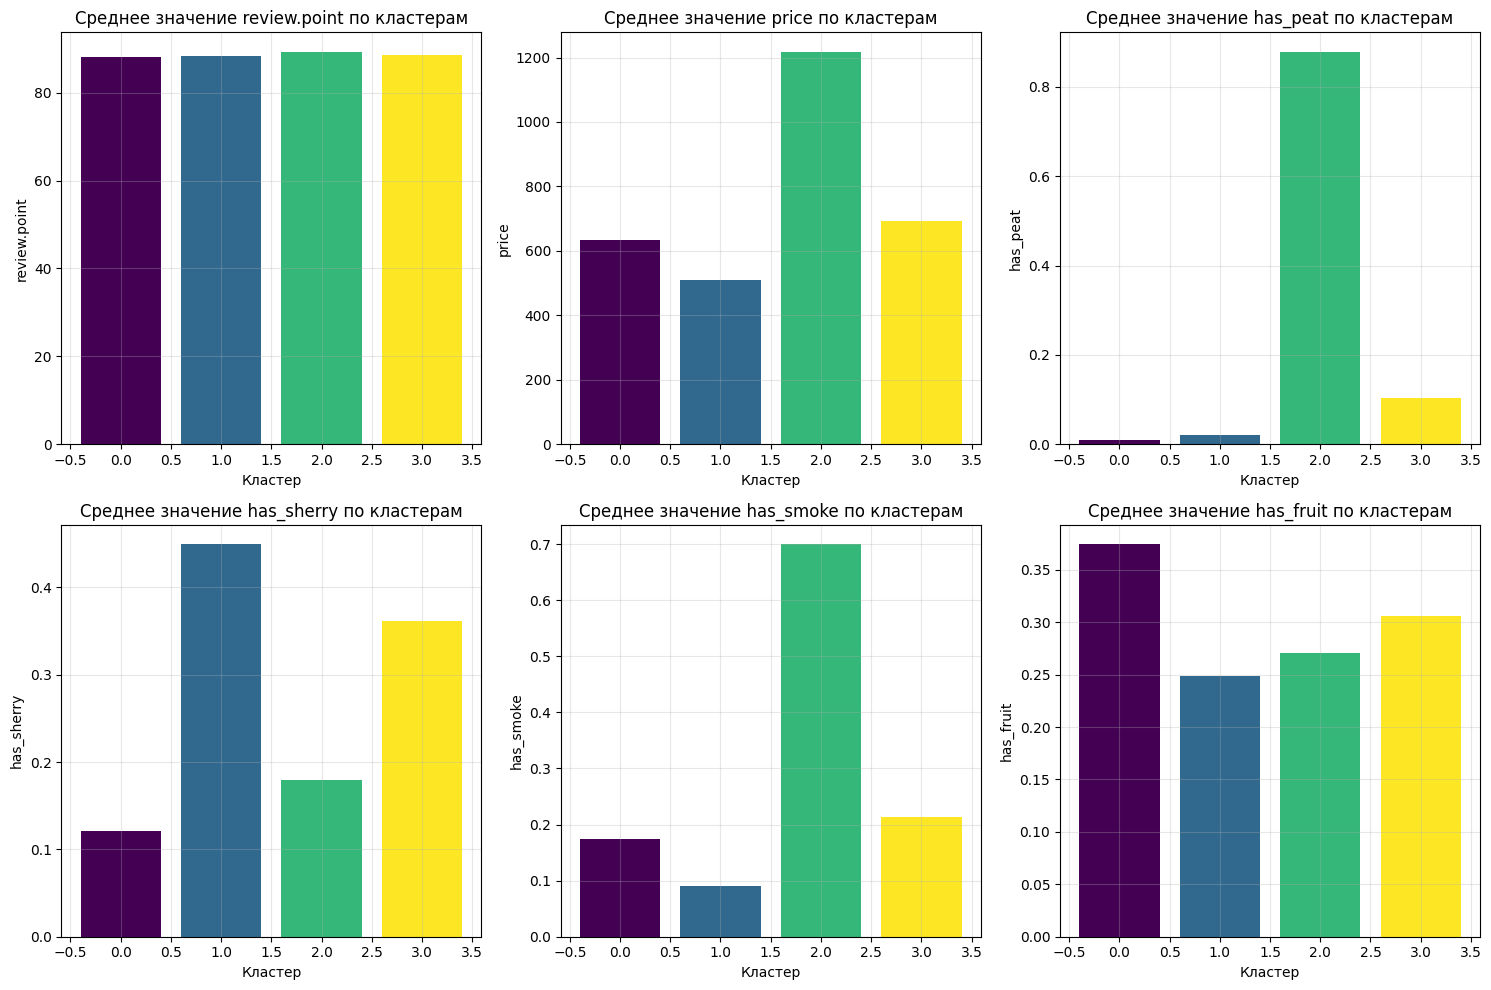

✓ Ensemble завершен успешно

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
                 Method  Silhouette  Calinski-Harabasz  Davies-Bouldin  \
0               K-Means       0.062            105.160           3.401   
1         Agglomerative       0.089             84.061           2.796   
2           Autoencoder      -0.013             41.632           5.994   
3  Affinity Propagation       0.058             14.452           1.985   
4            Mean Shift       0.182             16.894           0.903   
5              Ensemble       0.059             91.706           3.656   

   N_Clusters  
0           4  
1           4  
2           4  
3         186  
4           5  
5           4  


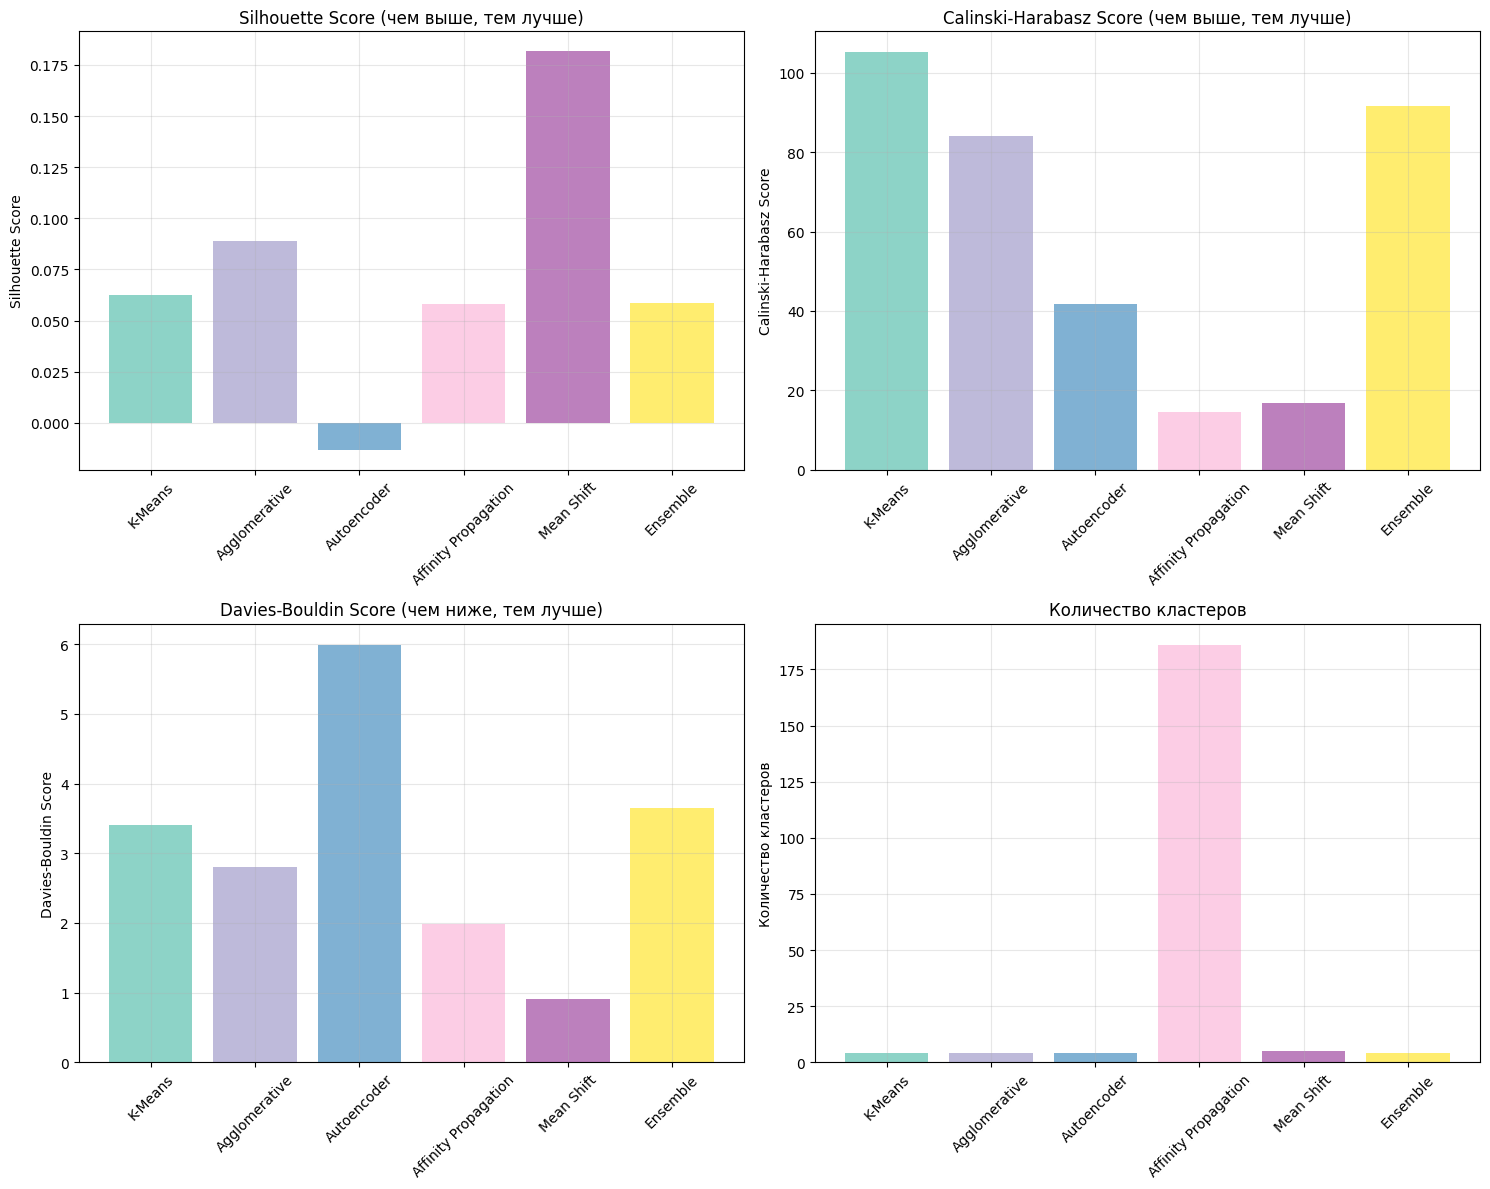

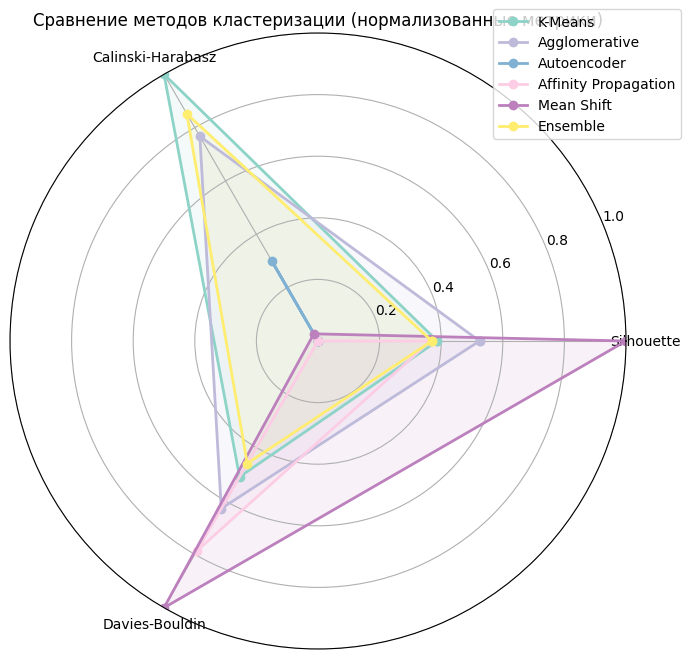


АНАЛИЗ РЕЗУЛЬТАТОВ
Лучший по Silhouette Score: Mean Shift (0.182)
Лучший по Calinski-Harabasz: K-Means (105.160)
Лучший по Davies-Bouldin: Mean Shift (0.903)

Рекомендация: Mean Shift показывает наилучшее качество кластеризации


Method  Silhouette  Calinski-Harabasz  Davies-Bouldin  \
0               K-Means    0.062274         105.159983        3.401057   
1         Agglomerative    0.089008          84.060953        2.796147   
2           Autoencoder   -0.013214          41.632151        5.994289   
3  Affinity Propagation    0.057935          14.452284        1.985282   
4            Mean Shift    0.181711          16.893704        0.903231   
5              Ensemble    0.058806          91.705871        3.655658   

   N_Clusters  
0           4  
1           4  
2           4  
3         186  
4           5  
5           4

In [5]:
from comparison import run_comparison
run_comparison()